In [380]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('CollegeRookieStatLog3.csv')
df.head()

,Unnamed: 0,Name,School,G,MP,FG,FGA,FG%,2P,2PA,...,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Pk,Tm,Year,Pos
0,0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,...,6.65,7.4,1.9,1.1,1.7,12.0,1,NJN,2000,PF
1,1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,...,5.84,3.6,0.4,0.8,1.0,4.9,2,VAN,2000,PF
2,2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,...,6.27,4.3,1.1,0.4,0.3,9.5,4,CHI,2000,PF
3,3,Mike Miller,Florida,65.0,26.7,4.5,9.2,0.483,3.3,5.8,...,7.07,4.0,1.7,0.6,0.2,11.9,5,ORL,2000,SF
4,4,DerMarr Johnson,Cincinnati,32.0,27.5,4.4,9.2,0.478,2.8,4.8,...,8.50,2.3,0.8,0.6,0.4,5.1,6,ATL,2000,SF


In [381]:
df = df.drop(['Unnamed: 0'], axis=1)

In [382]:
df = df.replace('C-', 'C')
positions = df.Pos.unique()
po_dict = dict(zip(positions, range(len(positions))))
df1 = df.replace({'Pos': po_dict})
teams = df.Tm.unique()
te_dict = dict(zip(teams, range(len(teams))))
df1 = df1.replace({'Tm': te_dict})
df1.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Pk,Tm,Year,Pos
0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,...,6.65,7.4,1.9,1.1,1.7,12.0,1,0,2000,0
1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,...,5.84,3.6,0.4,0.8,1.0,4.9,2,1,2000,0
2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,...,6.27,4.3,1.1,0.4,0.3,9.5,4,2,2000,0
3,Mike Miller,Florida,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,...,7.07,4.0,1.7,0.6,0.2,11.9,5,3,2000,1
4,DerMarr Johnson,Cincinnati,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,...,8.50,2.3,0.8,0.6,0.4,5.1,6,4,2000,1


In [383]:
df1['Fouls'] = df1['PF']
df1 = df1.drop(['PF'], axis=1)
dum1 = pd.get_dummies(df1['Pos'])
df1 = pd.concat([df1, dum1], axis=1)
df1 = df1.drop(['Pos'], axis=1)
df1.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,NBAPTS,Pk,Tm,Year,Fouls,0,1,2,3,4
0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,...,12.0,1,0,2000,2.0,1,0,0,0,0
1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,...,4.9,2,1,2000,2.6,1,0,0,0,0
2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,...,9.5,4,2,2000,1.9,1,0,0,0,0
3,Mike Miller,Florida,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,...,11.9,5,3,2000,1.9,0,1,0,0,0
4,DerMarr Johnson,Cincinnati,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,...,5.1,6,4,2000,2.0,0,1,0,0,0


In [384]:
schoolnames = df1.School.unique()
sc_dict = dict(zip(schoolnames, range(len(schoolnames))))
df1 = df1.replace({'School': sc_dict})
df1.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,NBAPTS,Pk,Tm,Year,Fouls,0,1,2,3,4
0,Kenyon Martin,0,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,...,12.0,1,0,2000,2.0,1,0,0,0,0
1,Stromile Swift,1,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,...,4.9,2,1,2000,2.6,1,0,0,0,0
2,Marcus Fizer,2,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,...,9.5,4,2,2000,1.9,1,0,0,0,0
3,Mike Miller,3,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,...,11.9,5,3,2000,1.9,0,1,0,0,0
4,DerMarr Johnson,0,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,...,5.1,6,4,2000,2.0,0,1,0,0,0


In [385]:
df1 = df1.drop(['School'], axis=1)
df1 = df1.set_index('Name')
df1.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,NBAPTS,Pk,Tm,Year,Fouls,0,1,2,3,4
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,0.0,0.1,...,12.0,1,0,2000,2.0,1,0,0,0,0
Stromile Swift,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,0.2,0.7,...,4.9,2,1,2000,2.6,1,0,0,0,0
Marcus Fizer,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,0.2,0.7,...,9.5,4,2,2000,1.9,1,0,0,0,0
Mike Miller,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,1.2,3.5,...,11.9,5,3,2000,1.9,0,1,0,0,0
DerMarr Johnson,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,1.6,4.4,...,5.1,6,4,2000,2.0,0,1,0,0,0


In [386]:
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
df1 = df1[[c for c in df1 if c not in cols_at_end] + [c for c in cols_at_end if c in df1]]
df1.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,0,1,2,3,4,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,0.0,0.1,...,1,0,0,0,0,7.4,1.9,1.1,1.7,12.0
Stromile Swift,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,0.2,0.7,...,1,0,0,0,0,3.6,0.4,0.8,1.0,4.9
Marcus Fizer,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,0.2,0.7,...,1,0,0,0,0,4.3,1.1,0.4,0.3,9.5
Mike Miller,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,1.2,3.5,...,0,1,0,0,0,4.0,1.7,0.6,0.2,11.9
DerMarr Johnson,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,1.6,4.4,...,0,1,0,0,0,2.3,0.8,0.6,0.4,5.1


In [387]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
dum = ['NBAPTS','NBATRB','NBAAST','NBASTL','NBABLK']
for du in dum:
    cols.remove(du)

In [118]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#cols = df1.columns
sc1 = StandardScaler()
for col in cols:
#    df1[[col]] = sc2.fit_transform(df1[[col]])
sc2 = StandardScaler()
#df1['NBAPTS'] = sc2.fit_transform(df1[['NBAPTS']])
sc3 = StandardScaler()
#df1[['NBABLK']] = sc3.fit_transform(df1[['NBABLK']])
sc4 = StandardScaler()
#df1[['NBASTL']] = sc4.fit_transform(df1[['NBASTL']])
sc5 = StandardScaler()
#df1[['NBAAST']] = sc5.fit_transform(df1[['NBAAST']])
sc6 = StandardScaler()
#df1[['NBATRB']] = sc6.fit_transform(df1[['NBATRB']])
df1.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,0,1,2,3,4,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,0.791051,-1.083978,-0.264125,-0.893807,1.872415,0.530167,0.142342,1.356737,-1.341998,-1.384652,...,1.922575,-0.488141,-0.343753,-0.546974,-0.590708,2.633067,0.465495,1.554361,4.471507,1.548442
Stromile Swift,-0.974416,-0.458212,0.280571,-0.356166,1.418773,0.917320,0.528005,1.263167,-1.080245,-1.081223,...,1.922575,-0.488141,-0.343753,-0.546974,-0.590708,0.618591,-0.593309,0.788456,2.283816,-0.134317
Marcus Fizer,0.282811,0.901210,1.836844,1.400128,0.563833,2.465931,2.584872,0.121612,-1.080245,-1.081223,...,1.922575,-0.488141,-0.343753,-0.546974,-0.590708,0.989679,-0.099200,-0.232752,0.096124,0.955921
Mike Miller,-0.573174,-0.436634,-0.186311,-0.284481,0.075295,-0.321569,-0.586131,0.888887,0.228517,0.334776,...,-0.520136,2.048590,-0.343753,-0.546974,-0.590708,0.830641,0.324322,0.277852,-0.216403,1.524741
DerMarr Johnson,-1.455907,-0.264009,-0.264125,-0.284481,-0.011944,-0.708722,-1.014645,1.076027,0.752023,0.789919,...,-0.520136,2.048590,-0.343753,-0.546974,-0.590708,-0.070572,-0.310961,0.277852,0.408652,-0.086916


In [388]:
df3 = df1[0:586]
df4 = df1[586:]

In [389]:
df4.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,0,1,2,3,4,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Zion Williamson,33.0,30.0,9.0,13.2,0.680,8.2,11.0,0.747,0.7,2.2,...,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0
RJ Barrett,38.0,35.3,8.4,18.5,0.454,6.5,12.2,0.529,1.9,6.2,...,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0
DeAndre Hunter,71.0,26.6,4.4,8.5,0.509,3.4,6.3,0.541,0.9,2.3,...,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0
Darius Garland,5.0,27.8,5.8,10.8,0.537,3.6,6.2,0.581,2.2,4.6,...,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
Coby White,35.0,28.5,5.4,12.7,0.423,3.0,6.1,0.500,2.3,6.6,...,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0


In [390]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8)):]
trains = np.split(train, [30], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [30], axis=1)
test_x=tests[0]
test_y=tests[1]

In [391]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [392]:
test_y.tail()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,
Sviatoslav Mykhailiuk,0.9,0.9,0.3,0.0,3.2
Keita Bates-Diop,2.8,0.6,0.6,0.5,5.0
Chimezie Metu,1.2,0.4,0.2,0.1,1.8
Alize Johnson,1.4,0.1,0.1,0.2,0.9
Thomas Welsh,0.4,0.5,0.0,0.0,1.6


## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


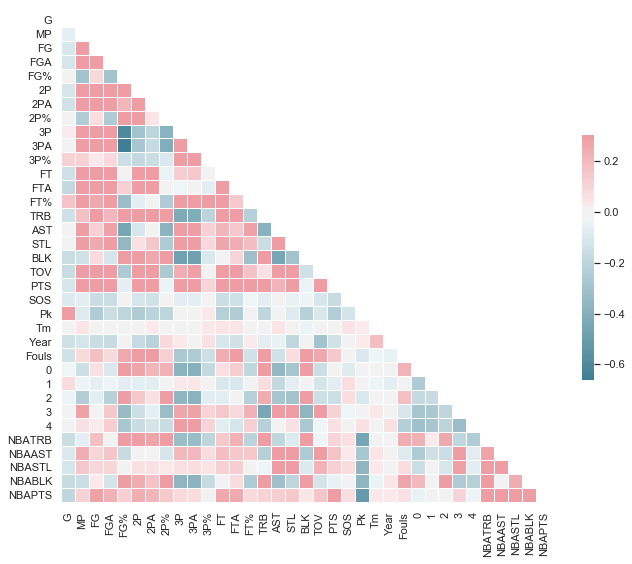

In [393]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

## Feature Selection

In [394]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, 27)
reg = rfe.fit(train_x.values, train_y.NBAPTS.values)
print(reg.support_)
print(reg.ranking_)

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
 False  True  True  True  True  True]
[4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 2 1 1 1 1 1]


In [411]:
reg.feature_importances_

array([0.03767104, 0.02505754, 0.02485141, 0.02649745, 0.01738842,
       0.0199374 , 0.0357133 , 0.01177516, 0.0157357 , 0.02716187,
       0.01904153, 0.01640884, 0.02834266, 0.03099861, 0.03095274,
       0.02749751, 0.01909213, 0.01843173, 0.04329637, 0.03427175,
       0.44376059, 0.0329539 , 0.00399083, 0.00261823, 0.00097941,
       0.0019286 , 0.00364528])

In [395]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
picks = []
for x in range(0,30):
    if reg.support_[x]:
        picks.append(cols[x])
train_x=train_x[picks]
test_x=test_x[picks]
train_x.head()

,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,...,TOV,PTS,SOS,Pk,Year,0,1,2,3,4
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,23.7,4.4,7.5,0.586,4.4,7.5,0.590,0.0,0.1,0.222,...,1.6,11.0,6.65,1.0,2000.0,1.0,0.0,0.0,0.0,0.0
Stromile Swift,26.6,5.1,9.0,0.560,4.9,8.4,0.585,0.2,0.7,0.242,...,2.5,13.4,5.84,2.0,2000.0,1.0,0.0,0.0,0.0,0.0
Marcus Fizer,32.9,7.1,13.9,0.511,6.9,13.2,0.524,0.2,0.7,0.292,...,2.3,18.9,6.27,4.0,2000.0,1.0,0.0,0.0,0.0,0.0
Mike Miller,26.7,4.5,9.2,0.483,3.3,5.8,0.565,1.2,3.5,0.345,...,2.2,13.3,7.07,5.0,2000.0,0.0,1.0,0.0,0.0,0.0
DerMarr Johnson,27.5,4.4,9.2,0.478,2.8,4.8,0.575,1.6,4.4,0.371,...,1.4,12.6,8.50,6.0,2000.0,0.0,1.0,0.0,0.0,0.0


## Linear Regression

In [396]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.NBAPTS.values)
#reg.score(train_x.values, train_y.NBAPTS.values)

reg.coef_

array([-0.24893656, -2.27748485, -2.38930108,  3.9060477 ,  1.6179385 ,
        2.59641374,  8.86559947,  2.69604696,  2.19597679, -0.3780143 ,
       -0.39269818,  0.24411382,  0.31890178,  0.28048126,  0.58597064,
        0.51204312,  0.04826015, -0.2508503 ,  0.42048291,  0.04642927,
       -0.10972962,  0.05966499, -0.64206742,  0.0574844 , -0.47141238,
        0.71303101,  0.34296439])

In [397]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] =(reg.predict(train_x.values))
test_y2['prediction'] =(reg.predict(test_x.values))
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

adj train r^2 = 0.3317248388992773
train mse = 10.495503947847995
adj test r^2 = 0.19491326444346546
test mse = 12.428977720418342


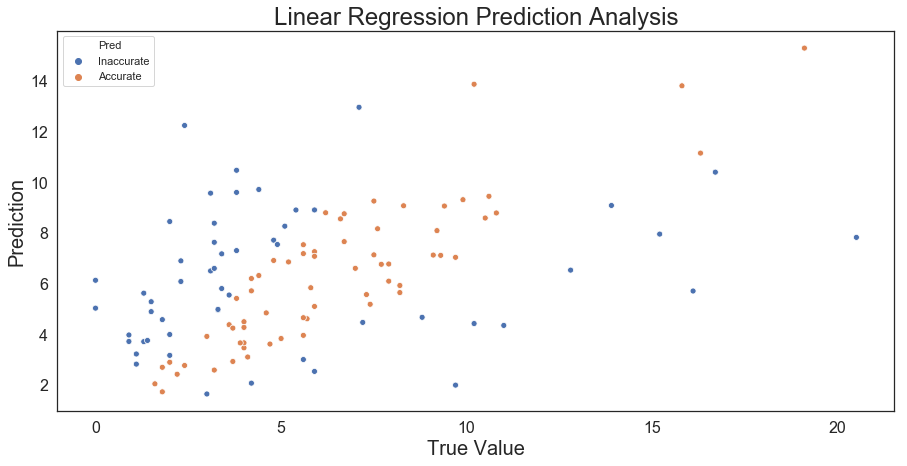

This model is able to relatively accurately predict 54.7% of NBA Rookies.


In [398]:
import seaborn as sns
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 1.5, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Linear Regression Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

In [399]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['chip'] = train_y3['NBAPTS'] - train_y3['prediction']
test_y3['chip'] = test_y2['NBAPTS'] - test_y2['prediction']
reg2 = LinearRegression().fit(train_x.values, train_y3.chip.values)
train_y3['prediction'] =(reg2.predict(train_x.values))
test_y3['prediction'] =(reg2.predict(test_x.values))
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y3.chip, train_y3.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y3.chip, train_y3.prediction)))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y3.chip, test_y3.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y3.chip, test_y3.prediction)))
test_y3.sort_values('prediction', ascending=False).head()

adj train r^2 = -0.061224489795918435
train mse = 10.495503947847995
adj test r^2 = -0.07633626433205998
test mse = 12.42897772041833


,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,Pred,chip
Name,,,,,,,,
Trae Young,3.7,8.1,0.9,0.2,19.1,1.416396e-15,Accurate,3.806494
Daniel Hamilton,0.8,1.3,0.2,0.0,2.0,-6.274704e-16,Accurate,-0.893683
Alize Johnson,1.4,0.1,0.1,0.2,0.9,-9.666368e-16,Inaccurate,-2.814332
Alec Peters,1.9,0.6,0.1,0.1,4.1,-1.182928e-15,Accurate,0.999382
Demetrius Jackson,0.8,0.6,0.0,0.0,2.0,-2.235157e-15,Inaccurate,-1.165630


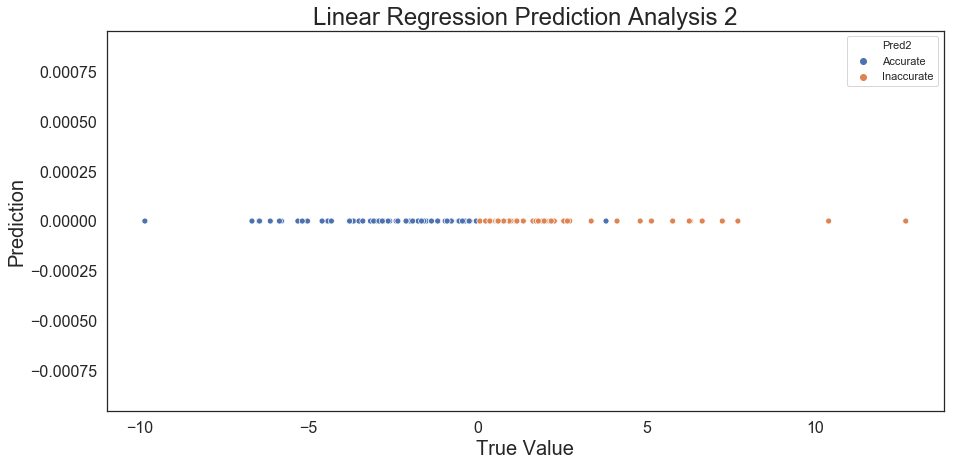

This model is able to relatively accurately predict 58.97% of NBA Rookies.


In [400]:
test_y3.loc[test_y3['prediction'] * test_y3['chip'] <= 0, 'Pred2'] = 'Inaccurate'
test_y3.loc[test_y3['prediction'] * test_y3['chip'] >0, 'Pred2'] = 'Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="chip", y="prediction", hue="Pred2", data=test_y3)
ax.set_title("Linear Regression Prediction Analysis 2", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y3[test_y3['Pred2'] == 'Accurate'])/len(test_y3),2)) + "% of NBA Rookies.")

## Extra Trees

In [401]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(min_samples_split=4, n_estimators=1000,bootstrap=True)
reg.fit(train_x.values, train_y.NBAPTS.values)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=4,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [402]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] =(reg.predict(train_x.values))
test_y2['prediction'] =(reg.predict(test_x.values))
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

adj train r^2 = 0.8833318570632508
train mse = 1.832315528178355
adj test r^2 = 0.21856285540890552
test mse = 12.063873904612372


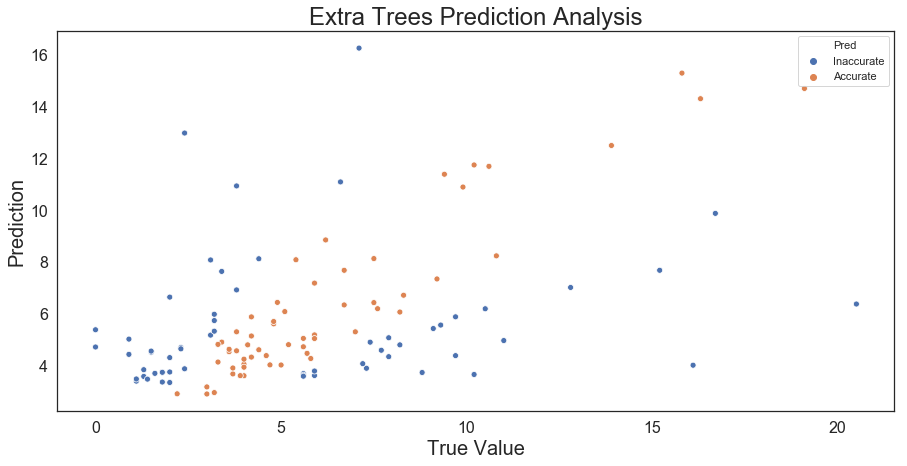

This model is able to relatively accurately predict 49.57% of NBA Rookies.


In [403]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 1.5, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Extra Trees Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

In [404]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['chip'] = train_y3['NBAPTS'] - train_y3['prediction']
test_y3['chip'] = test_y3['NBAPTS'] - test_y3['prediction']
reg2 = LinearRegression().fit(train_x.values, train_y3.chip.values)
train_y3['prediction'] =(reg2.predict(train_x.values))
test_y3['prediction'] =(reg2.predict(test_x.values))
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y3.chip, train_y3.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y3.chip, train_y3.prediction)))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y3.chip, test_y3.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y3.chip, test_y3.prediction)))
test_y3.sort_values('prediction', ascending=False).head()

adj train r^2 = 0.02048702694943816
train mse = 1.6897432211504422
adj test r^2 = -0.11275316613360409
test mse = 12.649608190842931


,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,Pred,chip
Name,,,,,,,,
Jaren Jackson,0.9,0.5,0.5,0.0,2.4,2.354895,Inaccurate,-10.582352
Ben Simmons,8.1,8.2,1.7,0.9,15.8,1.103671,Accurate,0.499679
Trae Young,3.7,8.1,0.9,0.2,19.1,0.719017,Accurate,4.395109
Sterling Brown,2.6,0.5,0.6,0.2,4.0,0.548268,Accurate,-0.235587
John Collins,7.3,1.3,0.6,1.1,10.5,0.537986,Inaccurate,4.314428


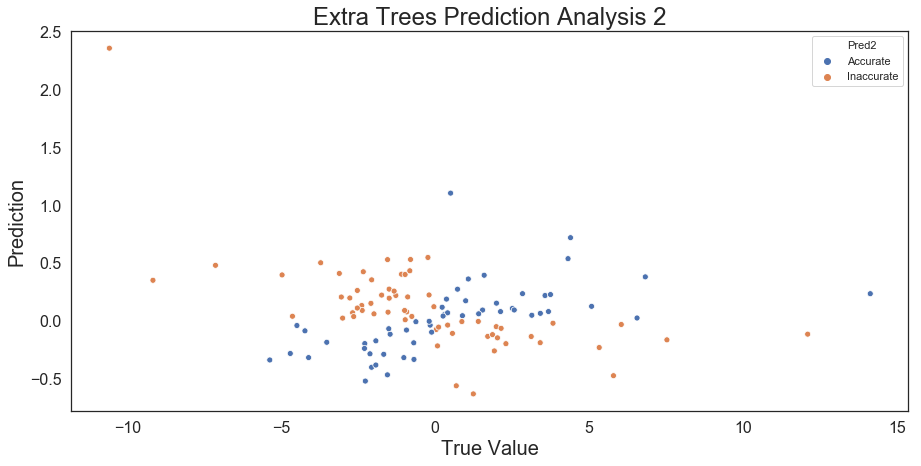

This model is able to relatively accurately predict 46.15% of NBA Rookies.


In [405]:
test_y3.loc[test_y3['prediction'] * test_y3['chip'] <= 0, 'Pred2'] = 'Inaccurate'
test_y3.loc[test_y3['prediction'] * test_y3['chip'] >0, 'Pred2'] = 'Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="chip", y="prediction", hue="Pred2", data=test_y3)
ax.set_title("Extra Trees Prediction Analysis 2", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y3[test_y3['Pred2'] == 'Accurate'])/len(test_y3),2)) + "% of NBA Rookies.")

## Random Forrest

In [406]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.NBAPTS.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [407]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] =(reg.predict(train_x.values))
test_y2['prediction'] =(reg.predict(test_x.values))
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

adj train r^2 = 0.9124985937954674
train mse = 1.3742413420682358
adj test r^2 = 0.21633262013245536
test mse = 12.098304411709384


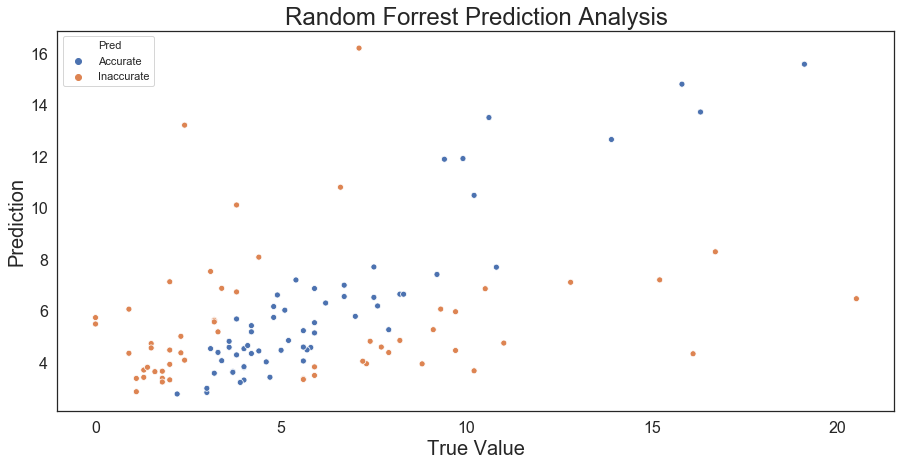

This model is able to relatively accurately predict 51.28% of NBA Rookies.


In [408]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 1.5, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Random Forrest Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

In [409]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['chip'] = train_y3['NBAPTS'] - train_y3['prediction']
test_y3['chip'] = test_y3['NBAPTS'] - test_y3['prediction']
reg2 = LinearRegression().fit(train_x.values, train_y3.chip.values)
train_y3['prediction'] =(reg2.predict(train_x.values))
test_y3['prediction'] =(reg2.predict(test_x.values))
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y3.chip, train_y3.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y3.chip, train_y3.prediction)))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y3.chip, test_y3.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y3.chip, test_y3.prediction)))
test_y3.sort_values('prediction', ascending=False).head()

adj train r^2 = 0.028122878377872307
train mse = 1.2574775623567573
adj test r^2 = -0.10849929360437649
test mse = 12.636590079399467


,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,Pred,chip
Name,,,,,,,,
Jaren Jackson,0.9,0.5,0.5,0.0,2.4,1.845189,Inaccurate,-10.8116
Ben Simmons,8.1,8.2,1.7,0.9,15.8,1.321268,Accurate,0.9983
Lonzo Ball,6.9,7.2,1.7,0.8,10.2,0.596238,Accurate,-0.2882
Monte Morris,0.7,2.3,1.0,0.0,3.3,0.558416,Accurate,-1.0942
Jawun Evans,1.8,2.1,0.8,0.1,4.8,0.538589,Accurate,-1.3739


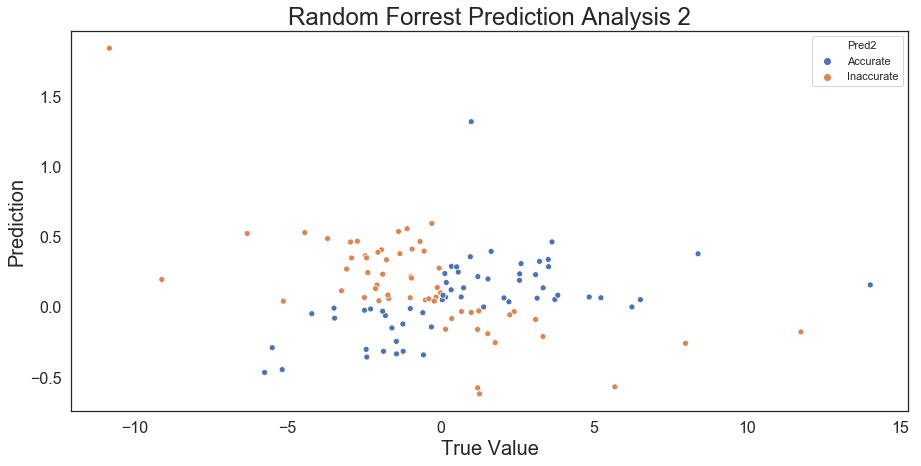

This model is able to relatively accurately predict 50.43% of NBA Rookies.


In [410]:
test_y3.loc[test_y3['prediction'] * test_y3['chip'] <= 0, 'Pred2'] = 'Inaccurate'
test_y3.loc[test_y3['prediction'] * test_y3['chip'] >0, 'Pred2'] = 'Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="chip", y="prediction", hue="Pred2", data=test_y3)
ax.set_title("Random Forrest Prediction Analysis 2", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y3[test_y3['Pred2'] == 'Accurate'])/len(test_y3),2)) + "% of NBA Rookies.")

## XGBoost

In [412]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [413]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=1000, max_depth=4, reg_lambda=.48, gamma=.3, booster='gblinear')
reg.fit(train_x.values, train_y.NBAPTS.values)

XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.3, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=0.48, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [414]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] =(reg.predict(train_x.values))
test_y2['prediction'] =(reg.predict(test_x.values))
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

adj train r^2 = 0.2831830371901326
train mse = 11.25787056137711
adj test r^2 = 0.26301916138601844
test mse = 11.377554763930373


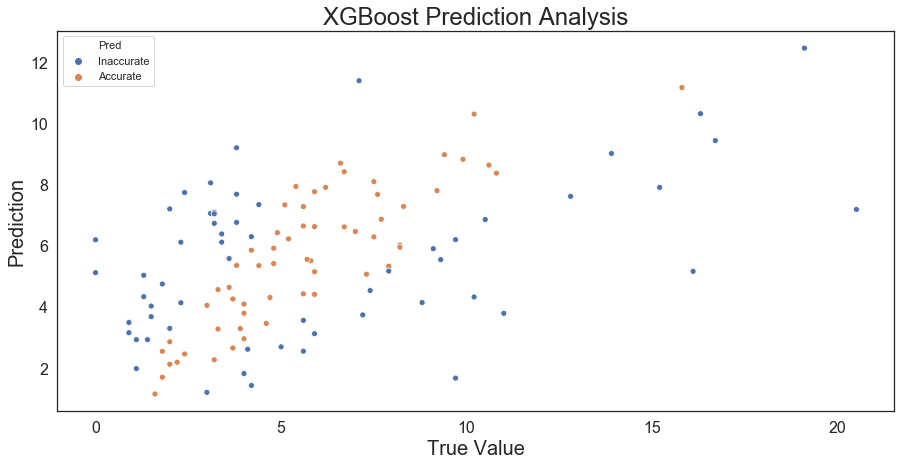

This model is able to relatively accurately predict 50.43% of NBA Rookies.


In [415]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 1.5, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("XGBoost Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

In [416]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['chip'] = train_y3['NBAPTS'] - train_y3['prediction']
test_y3['chip'] = test_y3['NBAPTS'] - test_y3['prediction']
reg2 = XGBRegressor(n_estimators=1000, max_depth=4, reg_lambda=.48, gamma=.3, booster='gblinear').fit(train_x.values, train_y3.chip.values)
train_y3['prediction'] =(reg2.predict(train_x.values))
test_y3['prediction'] =(reg2.predict(test_x.values))
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y3.chip, train_y3.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y3.chip, train_y3.prediction)))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y3.chip, test_y3.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y3.chip, test_y3.prediction)))
test_y3.sort_values('prediction', ascending=False).head()

adj train r^2 = -0.03912607834228332
train mse = 11.023410241676679
adj test r^2 = -0.0593836436529227
test mse = 11.290617087852414


,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,Pred,chip
Name,,,,,,,,
Trae Young,3.7,8.1,0.9,0.2,19.1,0.908212,Inaccurate,6.629678
Sterling Brown,2.6,0.5,0.6,0.2,4.0,0.745489,Inaccurate,2.174546
Lonzo Ball,6.9,7.2,1.7,0.8,10.2,0.718242,Accurate,-0.112871
Ben Simmons,8.1,8.2,1.7,0.9,15.8,0.603745,Accurate,4.619948
Jawun Evans,1.8,2.1,0.8,0.1,4.8,0.537175,Accurate,-1.125969


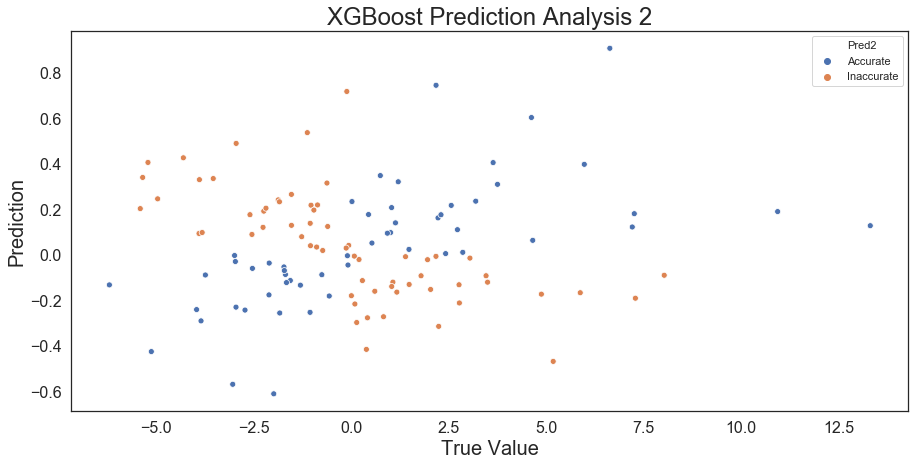

This model is able to relatively accurately predict 46.15% of NBA Rookies.


In [417]:
test_y3.loc[test_y3['prediction'] * test_y3['chip'] <= 0, 'Pred2'] = 'Inaccurate'
test_y3.loc[test_y3['prediction'] * test_y3['chip'] >0, 'Pred2'] = 'Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="chip", y="prediction", hue="Pred2", data=test_y3)
ax.set_title("XGBoost Prediction Analysis 2", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y3[test_y3['Pred2'] == 'Accurate'])/len(test_y3),2)) + "% of NBA Rookies.")

## Feed Forward Neural Network

In [418]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

In [426]:
K.clear_session()
model = Sequential()
model.add(Dense(128, input_dim=27, activation='linear'))
model.add(Dense(64, activation='linear'))
model.add(Dense(32, activation='linear'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=50, verbose=0, min_delta=.000001,restore_best_weights=True)
out = model.fit(train_x.values, train_y.NBAPTS.values, validation_data=[test_x.values, test_y['NBAPTS'].values.ravel()], epochs=500, batch_size=350, verbose=0, shuffle=False, callbacks=[early_stop])

In [427]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] =(model.predict(train_x.values))
test_y2['prediction'] =(model.predict(test_x.values))
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

adj train r^2 = 0.2760506284983978
train mse = 11.369887628506268
adj test r^2 = 0.27502875616267186
test mse = 11.192149913349779


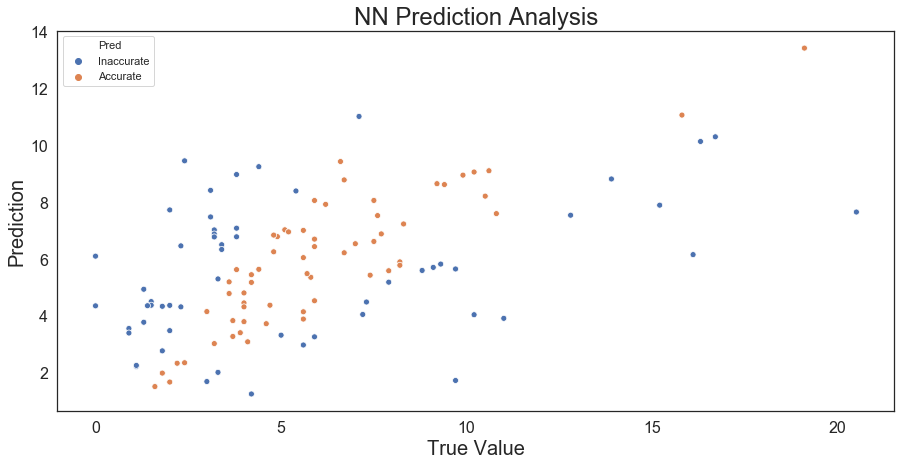

This model is able to relatively accurately predict 52.14% of NBA Rookies.


In [428]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 1.5, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("NN Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

In [429]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['chip'] = train_y3['NBAPTS'] - train_y3['prediction']
test_y3['chip'] = test_y3['NBAPTS'] - test_y3['prediction']
reg2 = XGBRegressor(n_estimators=1000, max_depth=4, reg_lambda=.48, gamma=.3, booster='gblinear').fit(train_x.values, train_y3.chip.values)
train_y3['prediction'] =(reg2.predict(train_x.values))
test_y3['prediction'] =(reg2.predict(test_x.values))
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y3.chip, train_y3.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y3.chip, train_y3.prediction)))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y3.chip, test_y3.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y3.chip, test_y3.prediction)))
test_y3.sort_values('prediction', ascending=False).head()

adj train r^2 = -0.032212644310338545
train mse = 10.9961404485897
adj test r^2 = -0.06958424762894655
test mse = 11.276056093953954


,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,Pred,chip
Name,,,,,,,,
Lonzo Ball,6.9,7.2,1.7,0.8,10.2,1.487532,Accurate,1.132822
Ben Simmons,8.1,8.2,1.7,0.9,15.8,1.026740,Accurate,4.728626
Monte Morris,0.7,2.3,1.0,0.0,3.3,0.828856,Inaccurate,1.282566
Delon Wright,1.4,1.1,0.3,0.1,3.8,0.809819,Inaccurate,-2.987469
Trae Young,3.7,8.1,0.9,0.2,19.1,0.699361,Accurate,5.672059


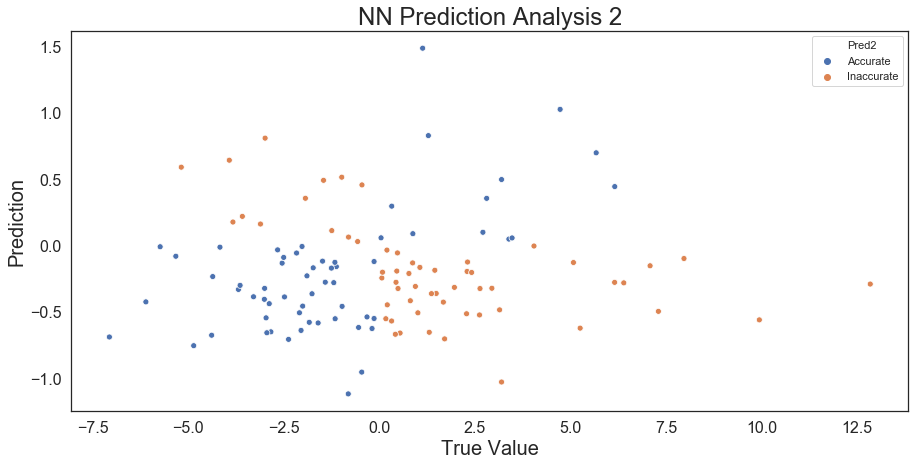

This model is able to relatively accurately predict 51.28% of NBA Rookies.


In [430]:
test_y3.loc[test_y3['prediction'] * test_y3['chip'] <= 0, 'Pred2'] = 'Inaccurate'
test_y3.loc[test_y3['prediction'] * test_y3['chip'] >0, 'Pred2'] = 'Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="chip", y="prediction", hue="Pred2", data=test_y3)
ax.set_title("NN Prediction Analysis 2", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y3[test_y3['Pred2'] == 'Accurate'])/len(test_y3),2)) + "% of NBA Rookies.")

## LSTM

In [431]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [432]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(600, input_shape=(1, train_x.values.shape[1]), activation='linear',kernel_initializer='lecun_uniform',return_sequences=True))
#model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(600, activation='relu'))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='tanh',kernel_initializer='lecun_uniform',return_sequences=True))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.NBAPTS.values.ravel(), validation_data=[X_tst_t, test_y['NBAPTS'].values.ravel()], epochs=40, verbose=0, shuffle=False, callbacks=[early_stop])

Restoring model weights from the end of the best epoch
Epoch 00039: early stopping


In [433]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] =(model_lstm.predict(X_tr_t))
test_y2['prediction'] =(model_lstm.predict(X_tst_t))
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

adj train r^2 = 0.350087668321042
train mse = 10.207109047202058
adj test r^2 = 0.27791100697758264
test mse = 11.14765355093186


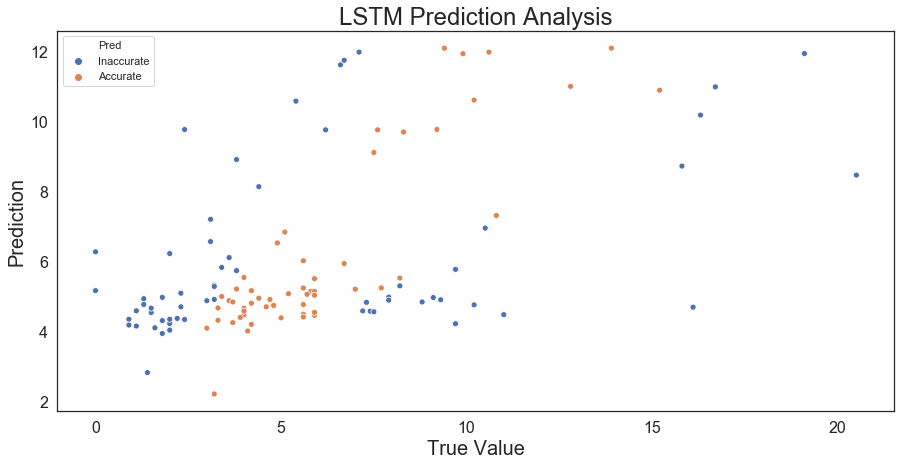

This model is able to relatively accurately predict 47.86% of NBA Rookies.


In [434]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 1.5, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("LSTM Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

In [435]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['chip'] = train_y3['NBAPTS'] - train_y3['prediction']
test_y3['chip'] = test_y3['NBAPTS'] - test_y3['prediction']
reg2 = XGBRegressor(n_estimators=1000, max_depth=4, reg_lambda=.48, gamma=.3, booster='gblinear').fit(train_x.values, train_y3.chip.values)
train_y3['prediction'] =(reg2.predict(train_x.values))
test_y3['prediction'] =(reg2.predict(test_x.values))
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y3.chip, train_y3.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y3.chip, train_y3.prediction)))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y3.chip, test_y3.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y3.chip, test_y3.prediction)))
test_y3.sort_values('prediction', ascending=False).head()

adj train r^2 = 0.03503351533756616
train mse = 9.238541691518998
adj test r^2 = -0.05248240955123595
test mse = 10.99990477021243


,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,Pred,chip
Name,,,,,,,,
Gary Trent,3.4,0.7,0.4,0.2,7.5,2.043220,Inaccurate,2.942535
Ben Simmons,8.1,8.2,1.7,0.9,15.8,1.882347,Inaccurate,7.074873
Markelle Fultz,3.1,3.8,0.9,0.3,7.1,1.774830,Inaccurate,-4.882432
Trae Young,3.7,8.1,0.9,0.2,19.1,1.642234,Inaccurate,7.158088
Pascal Siakam,3.4,0.3,0.5,0.8,4.2,1.327361,Accurate,-0.603171


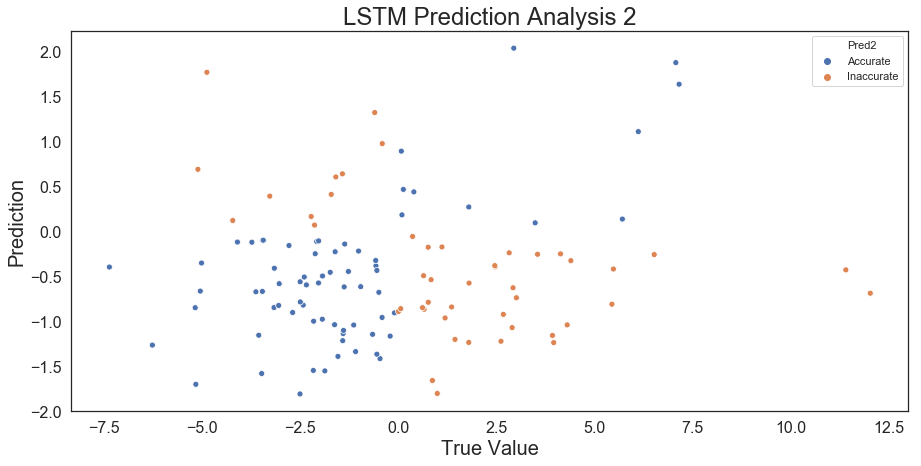

This model is able to relatively accurately predict 59.83% of NBA Rookies.


In [436]:
test_y3.loc[test_y3['prediction'] * test_y3['chip'] <= 0, 'Pred2'] = 'Inaccurate'
test_y3.loc[test_y3['prediction'] * test_y3['chip'] >0, 'Pred2'] = 'Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="chip", y="prediction", hue="Pred2", data=test_y3)
ax.set_title("LSTM Prediction Analysis 2", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y3[test_y3['Pred2'] == 'Accurate'])/len(test_y3),2)) + "% of NBA Rookies.")

## TPOT

In [437]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

#my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(population_size=10, max_time_mins=2, verbosity=1, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.NBAPTS.values.ravel())


2.0021997333333332 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: DecisionTreeRegressor(LinearSVR(SelectPercentile(LassoLarsCV(input_matrix, normalize=False), percentile=61), C=5.0, dual=False, epsilon=0.1, loss=squared_epsilon_insensitive, tol=0.1), max_depth=3, min_samples_leaf=19, min_samples_split=20)


TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=2, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=10,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=1,
       warm_start=False)

In [438]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] =(tpot.predict(train_x.values))
test_y2['prediction'] =(tpot.predict(test_x.values))
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

adj train r^2 = 0.475502708038571
train mse = 8.237420330496265
adj test r^2 = 0.1632196544391714
test mse = 12.918265588700871


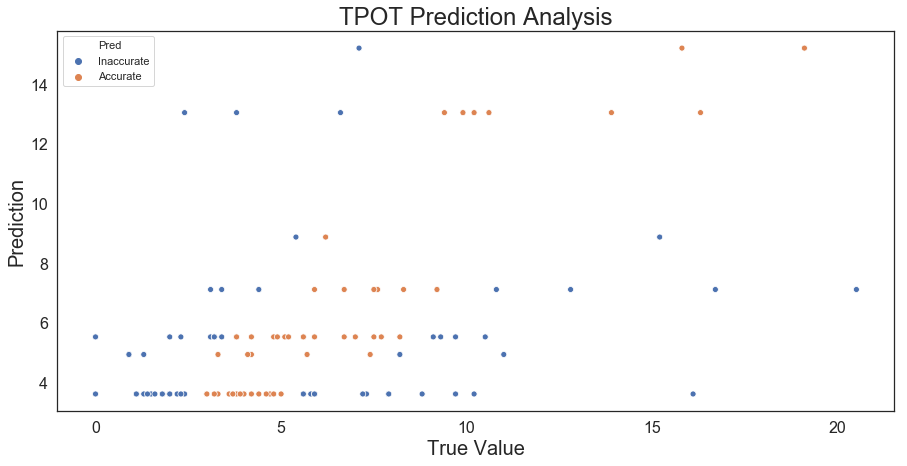

This model is able to relatively accurately predict 47.01% of NBA Rookies.


In [439]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 1.5, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("TPOT Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

In [440]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3['chip'] = train_y3['NBAPTS'] - train_y3['prediction']
test_y3['chip'] = test_y3['NBAPTS'] - test_y3['prediction']
reg2 = TPOTRegressor(population_size=10, max_time_mins=2, verbosity=1, config_dict='TPOT light').fit(train_x.values, train_y3.chip.values)
train_y3['prediction'] =(reg2.predict(train_x.values))
test_y3['prediction'] =(reg2.predict(test_x.values))
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y3.chip, train_y3.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y3.chip, train_y3.prediction)))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y3.chip, test_y3.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y3.chip, test_y3.prediction)))
test_y3.sort_values('prediction', ascending=False).head()


2.0022629166666666 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: ElasticNetCV(RBFSampler(input_matrix, gamma=0.1), l1_ratio=0.35000000000000003, tol=1e-05)
adj train r^2 = 0.024299948176499164
train mse = 7.5735638600865585
adj test r^2 = -0.06132533973897081
test mse = 12.906031321110897


,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,Pred,chip
Name,,,,,,,,
Aaron Holiday,1.3,1.7,0.4,0.3,5.9,0.855833,Accurate,0.370968
Pat Connaughton,0.9,0.3,0.1,0.0,1.1,0.818828,Inaccurate,-2.515854
Jarrett Allen,5.4,0.7,0.4,1.2,8.2,0.641115,Inaccurate,3.260274
Josh Okogie,2.9,1.2,1.2,0.4,7.7,0.637021,Accurate,2.170968
Hamidou Diallo,1.9,0.3,0.4,0.2,3.7,0.621446,Accurate,0.084146


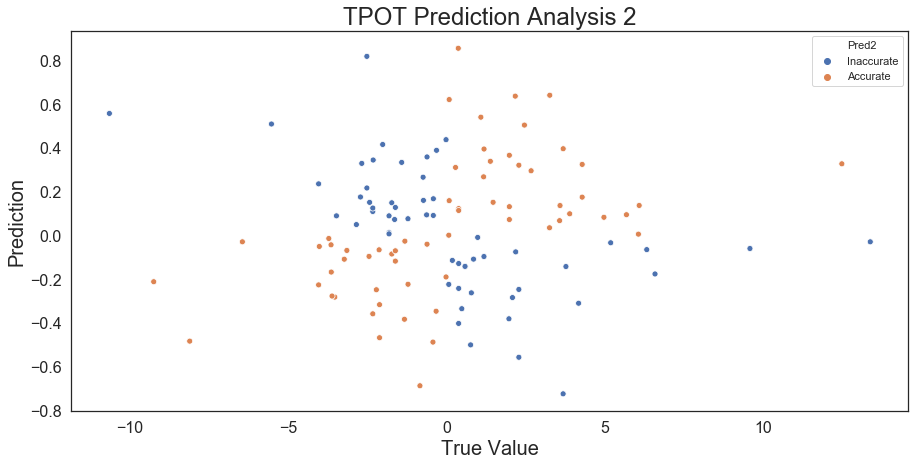

This model is able to relatively accurately predict 52.14% of NBA Rookies.


In [441]:
test_y3.loc[test_y3['prediction'] * test_y3['chip'] <= 0, 'Pred2'] = 'Inaccurate'
test_y3.loc[test_y3['prediction'] * test_y3['chip'] >0, 'Pred2'] = 'Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="chip", y="prediction", hue="Pred2", data=test_y3)
ax.set_title("TPOT Prediction Analysis 2", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y3[test_y3['Pred2'] == 'Accurate'])/len(test_y3),2)) + "% of NBA Rookies.")

## 2019 Predictions

In [442]:
train=df3
test=df4
trains = np.split(train, [30], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [30], axis=1)
test_x=tests[0]
test_y=tests[1]

In [443]:
test_x.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,SOS,Pk,Tm,Year,Fouls,0,1,2,3,4
Name,,,,,,,,,,,,,,,,,,,,,
Zion Williamson,33.0,30.0,9.0,13.2,0.680,8.2,11.0,0.747,0.7,2.2,...,11.97,1.0,36.0,2019.0,2.1,1.0,0.0,0.0,0.0,0.0
RJ Barrett,38.0,35.3,8.4,18.5,0.454,6.5,12.2,0.529,1.9,6.2,...,11.97,3.0,12.0,2019.0,1.8,0.0,0.0,0.0,0.0,1.0
DeAndre Hunter,71.0,26.6,4.4,8.5,0.509,3.4,6.3,0.541,0.9,2.3,...,9.61,4.0,14.0,2019.0,1.9,0.0,1.0,0.0,0.0,0.0
Darius Garland,5.0,27.8,5.8,10.8,0.537,3.6,6.2,0.581,2.2,4.6,...,7.79,5.0,5.0,2019.0,1.4,0.0,0.0,0.0,1.0,0.0
Coby White,35.0,28.5,5.4,12.7,0.423,3.0,6.1,0.500,2.3,6.6,...,11.35,6.0,26.0,2019.0,1.9,0.0,0.0,0.0,1.0,0.0


In [450]:
from sklearn.feature_selection import RFE
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
#scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
for x in range(5):
    col = cols_at_end[x]
    #scalar = scalars[4-x]
    model = LinearRegression()
    rfe = RFE(model, 27)
    reg = rfe.fit(train_x.values, train_y[col].values)
    cols = []
    co = df3.columns
    for colo in co:
        cols = cols + [colo]
    picks = []
    for x in range(0,30):
        if reg.support_[x]:
            picks.append(cols[x])
    train_x3 = train_x[picks]
    test_x3 = test_x[picks]
    K.clear_session()
    model = Sequential()
    model.add(Dense(128, input_dim=27, activation='linear'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='Adam', loss='mean_squared_error')
    early_stop = EarlyStopping(monitor='loss', patience=50, verbose=0, min_delta=.000001,restore_best_weights=True)
    out = model.fit(train_x3.values, train_y[col].values, epochs=500, batch_size=350, verbose=0, shuffle=False, callbacks=[early_stop])
    test_y2[col] = (model.predict(test_x3.values))

In [451]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = (model.predict(train_x3.values))
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))

adj train r^2 = 0.28955169448509777
train mse = 11.196686064971848


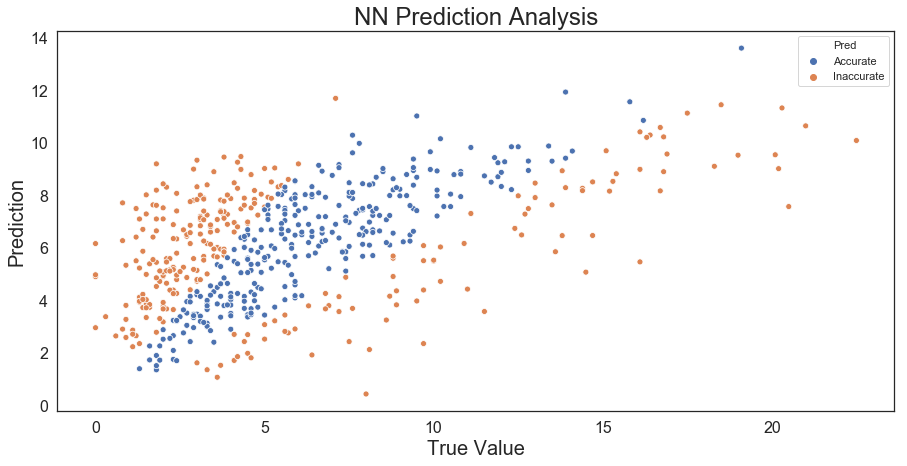

This model should be able to relatively accurately predict about 51.88% of NBA Rookies.


In [452]:
import seaborn as sns
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) >= 1.5, 'Pred'] = 'Inaccurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=train_y2)
ax.set_title("NN Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model should be able to relatively accurately predict about " + str(round(100*len(train_y2[train_y2['Pred'] == 'Accurate'])/len(train_y2),2)) + "% of NBA Rookies.")

In [453]:
test_y2 = test_y2.loc[~test_y2.index.duplicated(keep='first')]

In [454]:
test_y2['Value'] = 1*test_y2['NBAPTS'] + 1.2*test_y2['NBATRB'] + 1.5*test_y2['NBAAST'] + 3*test_y2['NBASTL'] + 3*test_y2['NBABLK']
test_y2.sort_values('Value', ascending=False)

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Value
Name,,,,,,
Zion Williamson,6.302336,4.731981,0.418232,1.306217,11.096998,30.931118
Bol Bol,4.858868,5.629262,0.555073,1.592548,8.993559,29.710955
RJ Barrett,3.791094,6.469640,0.697590,0.466510,11.023176,28.769249
Ja Morant,3.886362,3.654374,-0.276257,1.194324,10.935347,23.834745
Brandon Clarke,5.156854,2.972730,-0.042217,1.855838,7.378172,23.466354
Romeo Langford,2.045721,2.729585,1.417652,0.480213,6.459806,18.702642
Coby White,2.737929,2.174508,0.307377,0.253818,10.076429,18.307291
Jarrett Culver,3.141435,1.269544,0.721806,0.412250,8.787611,17.863815
Tyler Herro,1.931243,1.258115,1.809376,0.470569,6.284758,17.329256


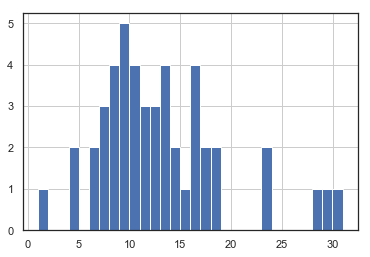

Value Distribution in Draft


In [455]:
hist = test_y2['Value'].hist(bins=30)
plt.show()
print('Value Distribution in Draft')
## This is the result of Neural Networks

In [456]:
test_y2['NBAPTS'].mean()

5.860879898071289

In [118]:
test_y2 = test_y2.round(2)
test_y2 = test_y2.sort_index(axis = 0) 
test_y2.head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Value
Name,,,,,,
Admiral Schofield,1.36,0.17,0.23,0.08,2.99,5.790000
Bol Bol,4.40,0.87,0.43,0.77,9.61,19.799999
Brandon Clarke,5.73,1.24,0.68,1.00,8.90,22.660000
Bruno Fernando,4.87,1.20,0.53,0.70,8.60,19.920000
Cam Reddish,1.96,1.47,0.72,0.29,7.84,15.430000


In [119]:
test_y2.to_csv('NewRookiePredictions3.csv')